# Learning curve

Have you seen a learning curve? 
We all know that they are out there, and we conduct our work knowing how important to have enough data to match the complexity of our models. Also, we know, that in the battle agains overfitting its a good sign it the in-sample error, and out-sample error  is more-or less the same. 

But personally i havent seen a learning curve. 
Practically in most of the cases, we just throw as many data point into the model as we have / as the computing capacity can hold.

Of course, I've came across many mock-up learning curves, during my courses.

One of the most authentic is of course  drawn by Andrew Ng: 

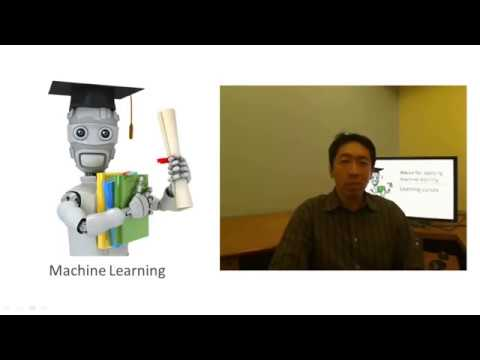

In [16]:
from IPython.display import YouTubeVideo

YouTubeVideo('ISBGFY-gBug',width=500, start=213 )

In [ ]:
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/ISBGFY-gBug/0.jpg)](https://www.youtube.com/watch?v=ISBGFY-gBug)

Lets now change this and actually create a learning curve!  
I will use  the  [diamond dataset from kaggle](https://www.kaggle.com/shivam2503/diamonds/dat)
and a simple out-of-the-box linear regression as a model.  
No preprocessing or model-specification was made, I've only dealt with the categorical variables, by creating the dummy-colums for them. 


In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import random
random.seed(100)

In [32]:
data=pd.read_csv("diamonds.csv", index_col=0)
print (data.shape)
data.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [33]:
data=pd.get_dummies(data, columns=['cut', 'color','clarity'], drop_first=True)

In [34]:
def learn(data, datapoints):
    print("learning from %s datapoints" % datapoints)
    cols = [col for col in data.columns if col != 'price']
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split( data[cols], data["price"], test_size=20000, random_state=100)

    out_errors=[]
    in_errors=[]
    for  i in range(100):
        training_indexes=random.sample(range(len(X_train_orig)), k=datapoints )

        X_train=X_train_orig.iloc[training_indexes]
        y_train=y_train_orig.iloc[training_indexes]

        model = LinearRegression()
        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test_orig)

        out_errors.append( mean_squared_error(y_test_orig,test_pred))
        in_errors.append(mean_squared_error(y_train,train_pred))
    
    return (sum(in_errors)/len(in_errors))**0.5, (sum(out_errors)/len(out_errors))**0.5


In [35]:

measurements= pd.DataFrame()
for datapoints in range(500,12000,500):
    
    ise, ose =learn(data, datapoints)
    values=pd.DataFrame([{'observations':datapoints, 'in_sample_error':ise, 'out_sample_error':ose}])
   
    measurements= measurements.append(values,ignore_index=True)

learning from 500 datapoints
learning from 1000 datapoints
learning from 1500 datapoints
learning from 2000 datapoints
learning from 2500 datapoints
learning from 3000 datapoints
learning from 3500 datapoints
learning from 4000 datapoints
learning from 4500 datapoints
learning from 5000 datapoints
learning from 5500 datapoints
learning from 6000 datapoints
learning from 6500 datapoints
learning from 7000 datapoints
learning from 7500 datapoints
learning from 8000 datapoints
learning from 8500 datapoints
learning from 9000 datapoints
learning from 9500 datapoints
learning from 10000 datapoints
learning from 10500 datapoints
learning from 11000 datapoints
learning from 11500 datapoints


For the sake of tidiness, I've re-sampled the data 100 times  and stored the average error for those models.  
Lots of work, but the results are great:

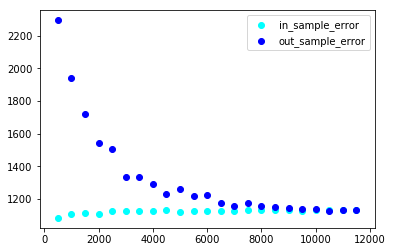

In [36]:
plt.scatter( measurements['observations'],measurements['in_sample_error'], color="cyan")
plt.scatter( measurements['observations'],measurements['out_sample_error'], color="blue")
plt.legend()
plt.show()